GOAL


Predict the diagnosis of a person (Classification problem)

Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

About Dataset
SchizoHealth Dataset

This dataset is a comprehensive collection of demographic, clinical, and psychosocial information about schizophrenia patients. It serves as a valuable resource for researchers, doctors, and data scientists. The dataset includes patients' diagnosis status, symptom scores, treatment history, and social factors.

Columns and Descriptions

Patient_ID – Unique identifier assigned to each patient
Age – Patient's age (between 18 and 80)
Gender – 0: Female, 1: Male
Education_Level – 1: Primary, 2: Middle School, 3: High School, 4: University, 5: Postgraduate
Marital_Status – 0: Single, 1: Married, 2: Divorced, 3: Widowed
Occupation – 0: Unemployed, 1: Employed, 2: Retired, 3: Student
Income_Level – 0: Low, 1: Medium, 2: High
Living_Area – 0: Rural, 1: Urban
Diagnosis – 0: Not schizophrenic, 1: Schizophrenic
Disease_Duration – Duration of illness for schizophrenia patients (1-40 years)
Hospitalizations – Number of hospital admissions (ranges from 0 to 10 for schizophrenia patients)
Family_History – 0: No, 1: Yes (Genetic predisposition)
Substance_Use – 0: No, 1: Yes (Tobacco, alcohol, or other substances)
Suicide_Attempt – 0: No, 1: Yes
Positive_Symptom_Score – Ranges from 0 to 100 (Higher scores indicate more symptoms)
Negative_Symptom_Score – Ranges from 0 to 100 (Higher scores indicate more negative symptoms)
GAF_Score – Global Assessment of Functioning (Ranges from 0 to 100, lower scores indicate worse functioning)
Social_Support – 0: Low, 1: Medium, 2: High
Stress_Factors – 0: Low, 1: Medium, 2: High
Medication_Adherence – 0: Poor, 1: Moderate, 2: Good

This dataset has been carefully designed for schizophrenia research.

Read dataset and Overview

In [3]:
df=pd.read_csv('schizophrenia_dataset.csv')

In [4]:
df.head(3)

,Hasta_ID,Yaş,Cinsiyet,Eğitim_Seviyesi,Medeni_Durum,Meslek,Gelir_Düzeyi,Yaşadığı_Yer,Tanı,Hastalık_Süresi,Hastaneye_Yatış_Sayısı,Ailede_Şizofreni_Öyküsü,Madde_Kullanımı,İntihar_Girişimi,Pozitif_Semptom_Skoru,Negatif_Semptom_Skoru,GAF_Skoru,Sosyal_Destek,Stres_Faktörleri,İlaç_Uyumu
0,1,72,1,4,2,0,2,1,0,0,0,0,0,0,32,48,72,0,2,2
1,2,49,1,5,2,2,1,0,1,35,1,1,1,1,51,63,40,2,2,0
2,3,53,1,5,3,2,1,0,1,32,0,1,0,0,72,85,51,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Hasta_ID                 10000 non-null  int64
 1   Yaş                      10000 non-null  int64
 2   Cinsiyet                 10000 non-null  int64
 3   Eğitim_Seviyesi          10000 non-null  int64
 4   Medeni_Durum             10000 non-null  int64
 5   Meslek                   10000 non-null  int64
 6   Gelir_Düzeyi             10000 non-null  int64
 7   Yaşadığı_Yer             10000 non-null  int64
 8   Tanı                     10000 non-null  int64
 9   Hastalık_Süresi          10000 non-null  int64
 10  Hastaneye_Yatış_Sayısı   10000 non-null  int64
 11  Ailede_Şizofreni_Öyküsü  10000 non-null  int64
 12  Madde_Kullanımı          10000 non-null  int64
 13  İntihar_Girişimi         10000 non-null  int64
 14  Pozitif_Semptom_Skoru    10000 non-null  int64
 15  Neg

In [8]:
# Language replacement:
df["Disease Duration"]=df["Hastalık_Süresi"]
df["Diagnosis"]=df["Tanı"]
df["Live Area"]=df["Yaşadığı_Yer"]
df["Income level"]=df["Gelir_Düzeyi"]
df["Occupation"]=df["Meslek"]
df["Martial Statuts"]=df["Medeni_Durum"]
df["Education Level"]=df["Eğitim_Seviyesi"]
df["Gender"]=df["Cinsiyet"]
df["Age"]=df["Yaş"]
df["Patient ID"]=df["Hasta_ID"]
df["Medication Adherence"]=df["İlaç_Uyumu"]
df["Stress Factors"]=df["Stres_Faktörleri"]
df["Social Support"]=df["Sosyal_Destek"]
df["GAF Score"]=df["GAF_Skoru"]
df["Negative Symptom Score"]=df["Negatif_Semptom_Skoru"]
df["Positive Symptom Score"]=df["Pozitif_Semptom_Skoru"]
df["Suicide Attempt"]=df["İntihar_Girişimi"]
df["Substance use"]=df["Madde_Kullanımı"]
df["Family History"]=df["Ailede_Şizofreni_Öyküsü"]
df["Hospitalizations"]=df["Hastaneye_Yatış_Sayısı"]


df.drop(["Hastalık_Süresi", "Tanı", "Yaşadığı_Yer", "Gelir_Düzeyi", "Meslek", "Medeni_Durum", "Eğitim_Seviyesi", "Cinsiyet", "Yaş", "Hasta_ID", "İlaç_Uyumu", "Stres_Faktörleri", "Sosyal_Destek", "GAF_Skoru", "Negatif_Semptom_Skoru", "Pozitif_Semptom_Skoru", "İntihar_Girişimi", "Madde_Kullanımı", "Ailede_Şizofreni_Öyküsü", "Hastaneye_Yatış_Sayısı"], axis=1, inplace=True) 

KeyError: 'Hastalık_Süresi'

In [9]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    
    display(summ)

summary(df)

data shape: (10000, 20)


,Data Type,Missing,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation
Disease Duration,int64,0,0.0,0,41,10000,0.0,40.0,5.8590,11.066814
Diagnosis,int64,0,0.0,0,2,10000,0.0,1.0,0.2887,0.453181
Live Area,int64,0,0.0,0,2,10000,0.0,1.0,0.4994,0.500025
Income level,int64,0,0.0,0,3,10000,0.0,2.0,0.9969,0.817531
Occupation,int64,0,0.0,0,4,10000,0.0,3.0,1.5106,1.114097
Martial Statuts,int64,0,0.0,0,4,10000,0.0,3.0,1.5182,1.117315
Education Level,int64,0,0.0,0,5,10000,1.0,5.0,3.0426,1.423021
Gender,int64,0,0.0,0,2,10000,0.0,1.0,0.5026,0.500018
Age,int64,0,0.0,0,63,10000,18.0,80.0,48.8677,18.215054
Patient ID,int64,0,0.0,0,10000,10000,1.0,10000.0,5000.5000,2886.895680


In [11]:
df.isnull().sum()

Disease Duration          0
Diagnosis                 0
Live Area                 0
Income level              0
Occupation                0
Martial Statuts           0
Education Level           0
Gender                    0
Age                       0
Patient ID                0
Medication Adherence      0
Stress Factors            0
Social Support            0
GAF Score                 0
Negative Symptom Score    0
Positive Symptom Score    0
Suicide Attempt           0
Substance use             0
Family History            0
Hospitalizations          0
dtype: int64

Observations: There is no missing values

In [10]:
df[df.duplicated()]
# Or: df.duplicated().sum()

,Disease Duration,Diagnosis,Live Area,Income level,Occupation,Martial Statuts,Education Level,Gender,Age,Patient ID,Medication Adherence,Stress Factors,Social Support,GAF Score,Negative Symptom Score,Positive Symptom Score,Suicide Attempt,Substance use,Family History,Hospitalizations


Observations: There is no duplicates

In [11]:
# Drop the Patient ID column
df.drop('Patient ID', axis=1, inplace=True)

Checking Correlations and feature selection

In [12]:
df.corr()

,Disease Duration,Diagnosis,Live Area,Income level,Occupation,Martial Statuts,Education Level,Gender,Age,Medication Adherence,Stress Factors,Social Support,GAF Score,Negative Symptom Score,Positive Symptom Score,Suicide Attempt,Substance use,Family History,Hospitalizations
Disease Duration,1.000000,0.831047,-0.012630,-0.001983,0.003147,0.006605,-0.006179,0.012645,0.008712,-0.276288,-0.006855,-0.004394,-0.704237,0.702451,0.708023,0.390192,0.230245,0.325392,0.680782
Diagnosis,0.831047,1.000000,-0.023730,-0.010541,-0.000416,0.010262,-0.001394,0.004411,0.019215,-0.340134,-0.001687,-0.003621,-0.847212,0.843931,0.846972,0.488795,0.264959,0.390557,0.800552
Live Area,-0.012630,-0.023730,1.000000,0.005745,0.014194,0.005032,-0.000245,0.008406,-0.006207,-0.003086,0.007708,0.001587,0.017794,-0.026897,-0.019269,-0.020058,-0.003486,-0.008184,-0.016421
Income level,-0.001983,-0.010541,0.005745,1.000000,0.011401,-0.007767,-0.002465,-0.004262,-0.012761,0.000188,0.011521,0.003273,0.005332,-0.011554,-0.017910,-0.003128,-0.007485,-0.006058,-0.011494
Occupation,0.003147,-0.000416,0.014194,0.011401,1.000000,0.001773,0.014224,0.004977,0.004497,-0.000227,-0.005313,0.000033,0.004502,-0.003100,-0.000800,0.004310,-0.014264,-0.003441,0.003968
Martial Statuts,0.006605,0.010262,0.005032,-0.007767,0.001773,1.000000,-0.011684,0.001347,0.010308,0.009206,-0.007915,-0.007276,-0.007085,0.005791,0.010237,-0.003496,-0.003930,0.010141,0.007206
Education Level,-0.006179,-0.001394,-0.000245,-0.002465,0.014224,-0.011684,1.000000,0.010386,-0.001114,0.016550,0.010884,-0.012854,0.009261,-0.002759,-0.008078,-0.003629,-0.019028,0.002690,-0.003374
Gender,0.012645,0.004411,0.008406,-0.004262,0.004977,0.001347,0.010386,1.000000,0.001317,-0.015846,-0.004275,-0.002779,-0.002024,0.006404,0.015857,0.006131,-0.006378,0.008016,0.009706
Age,0.008712,0.019215,-0.006207,-0.012761,0.004497,0.010308,-0.001114,0.001317,1.000000,0.001156,0.012526,0.004016,-0.022126,0.021742,0.016859,0.017676,0.014954,-0.000285,0.017385
Medication Adherence,-0.276288,-0.340134,-0.003086,0.000188,-0.000227,0.009206,0.016550,-0.015846,0.001156,1.000000,-0.003161,0.009775,0.288592,-0.290150,-0.286768,-0.183803,-0.081527,-0.137974,-0.273098


<Axes: >

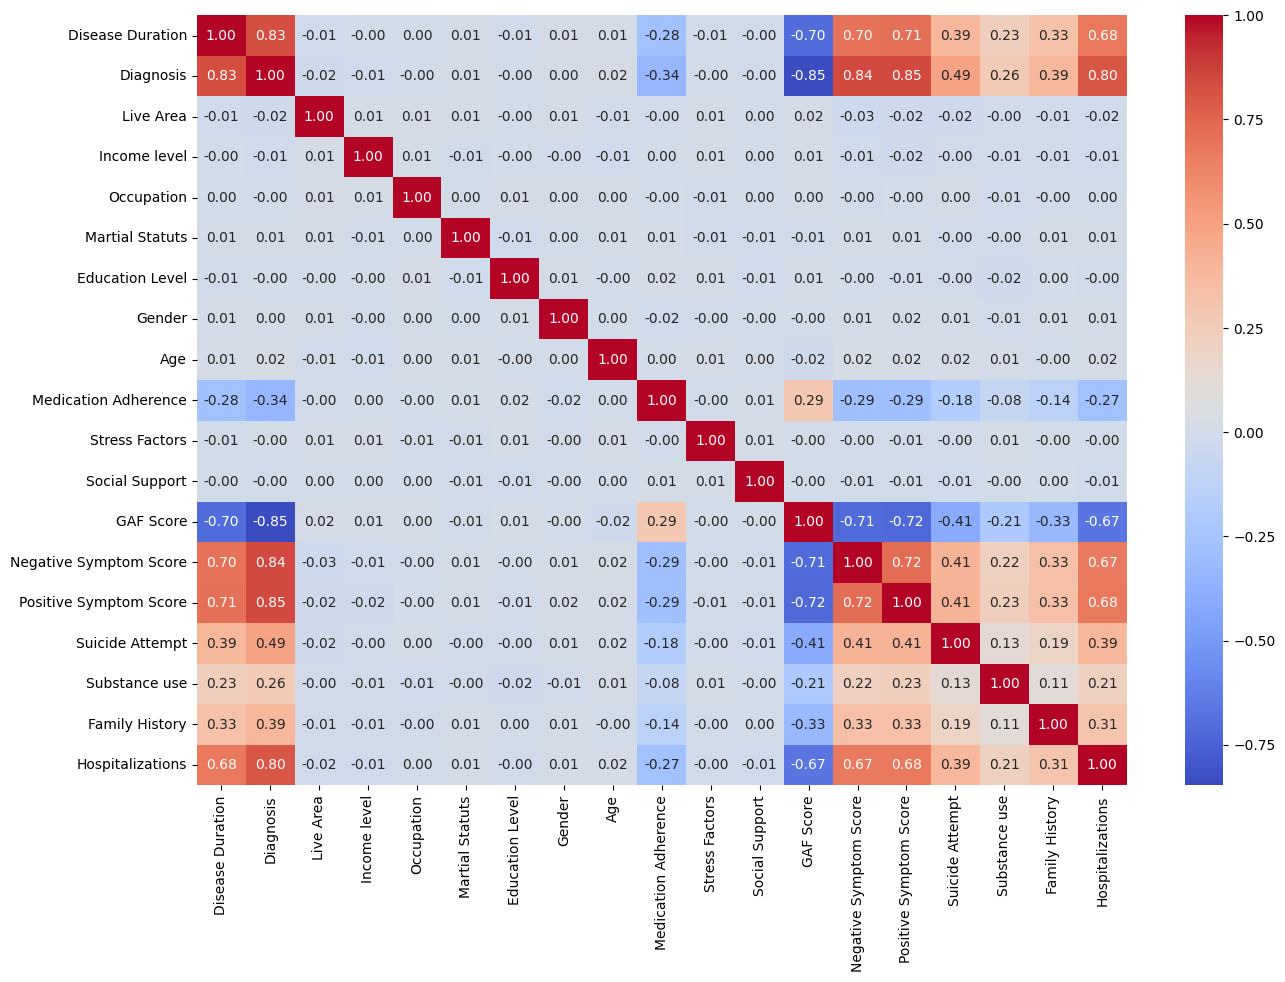

In [13]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [14]:
def high_correlation_retriever(dataset, treshold):
    # col_corr=set()
    col_corr=[]
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> treshold:
                col_name= corr_matrix.columns[i]
                # col_corr.add(col_name)
                col_corr.append(col_name)
    return col_corr

high_correlation_retriever(df, 0.80)

['Diagnosis',
 'GAF Score',
 'Negative Symptom Score',
 'Positive Symptom Score',
 'Hospitalizations']

In [15]:
df.drop(['GAF Score','Negative Symptom Score',], axis=1, inplace=True)

In [16]:
df.head()

,Disease Duration,Diagnosis,Live Area,Income level,Occupation,Martial Statuts,Education Level,Gender,Age,Medication Adherence,Stress Factors,Social Support,Positive Symptom Score,Suicide Attempt,Substance use,Family History,Hospitalizations
0,0,0,1,2,0,2,4,1,72,2,2,0,32,0,0,0,0
1,35,1,0,1,2,2,5,1,49,0,2,2,51,1,1,1,1
2,32,1,0,1,2,3,5,1,53,1,1,0,72,0,0,1,0
3,0,0,0,2,0,2,3,1,67,2,1,1,10,0,1,0,0
4,0,0,1,2,0,2,1,0,54,0,1,0,4,0,0,0,0


In [17]:
# Séparation of features by type(stay in the part of feature encoding when we know that don't have to handle outliers)
numerical_cols=[col for col in df.columns if df[col].dtype != "O"]

print(f"There are {len(numerical_cols)} numerical features")
categorical_cols=[col for col in df.columns if df[col].dtype == "O"]

print(f"There are {len(categorical_cols)} categorical features")

discrete_cols=[col for col in numerical_cols if len(df[col].unique()) <=10 ]
print(f"There are {len(discrete_cols)} discrete features")

continuous_cols=[col for col in numerical_cols if df[col].nunique() >10 ]
print(f"There are {len(continuous_cols)} continuous features")

There are 17 numerical features
There are 0 categorical features
There are 13 discrete features
There are 4 continuous features


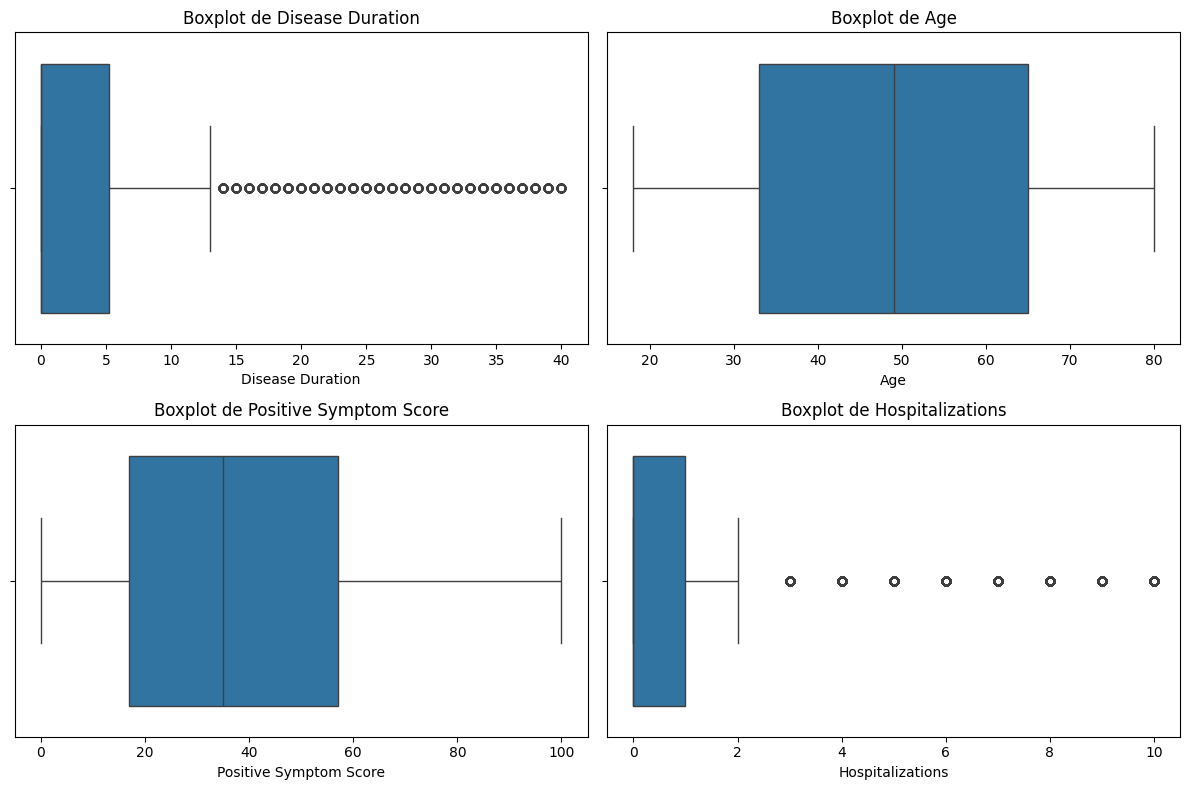

In [18]:
# Handling Outliers
# After testing with numerical_cols I see that it is better with continuous_cols
plt.figure(figsize=(12, 8))
for i,feature in enumerate(continuous_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot de {feature}')

plt.tight_layout()
plt.show()

Observation: There are many outliers for Hospitalizations and Disease Duration

In [19]:
# To handle them we should drop the rows that countains values more or less than lower and higher fence
for i in range (0, len(continuous_cols)):
     minimum, Q1, median, Q3, maximum = np.quantile(df[continuous_cols[i]], [0, 0.25, 0.5, 0.75, 1])
     IQR =Q1-Q3
     lower_fence=Q1-1.5*IQR
     higher_fence=Q1+1.5*IQR
     print(f"""{continuous_cols[i]} :
               Minimum: {minimum}
               Q1: {Q1}
               Median: {median}
               Q3: {Q3}
               Maximum: {maximum}
               Lower_fence: {lower_fence}
               Higher_fence: {higher_fence}""")
     print('-'*30)

Disease Duration :
               Minimum: 0.0
               Q1: 0.0
               Median: 0.0
               Q3: 5.25
               Maximum: 40.0
               Lower_fence: 7.875
               Higher_fence: -7.875
------------------------------
Age :
               Minimum: 18.0
               Q1: 33.0
               Median: 49.0
               Q3: 65.0
               Maximum: 80.0
               Lower_fence: 81.0
               Higher_fence: -15.0
------------------------------
Positive Symptom Score :
               Minimum: 0.0
               Q1: 17.0
               Median: 35.0
               Q3: 57.0
               Maximum: 100.0
               Lower_fence: 77.0
               Higher_fence: -43.0
------------------------------
Hospitalizations :
               Minimum: 0.0
               Q1: 0.0
               Median: 0.0
               Q3: 1.0
               Maximum: 10.0
               Lower_fence: 1.5
               Higher_fence: -1.5
------------------------------


In [20]:
 # But I will not do that

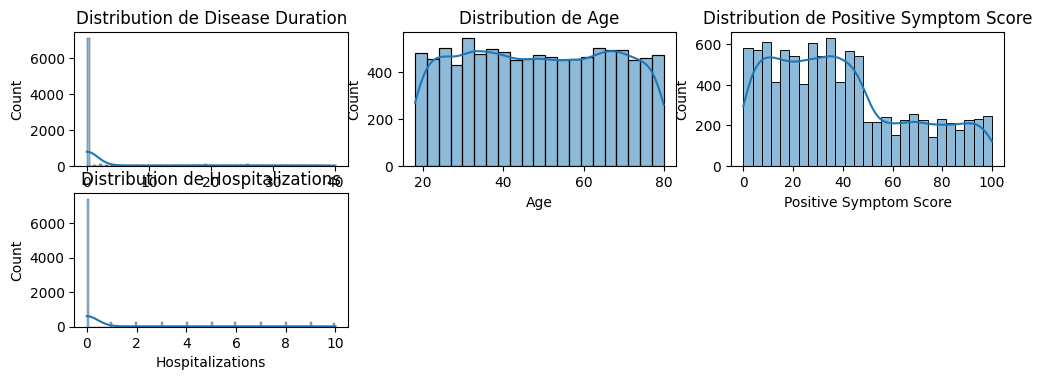

In [21]:
# View of Features Distribution:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(continuous_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution de {feature}')
    

Observations: All continuous columns don't follow a normal distribution

Machine Learning Part

Feature Encoding

Obviously we seen that there is no text values in the dataset so we will not perform encoding(Label, OneHot or even Target)

In [46]:
# Independent and dependent features
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']

In [49]:
# Separation of dataset into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

X_train.shape, X_test.shape

((7500, 16), (2500, 16))

Standardization

In [50]:
from sklearn.preprocessing import StandardScaler
processor=StandardScaler()
X_train_scaled=processor.fit_transform(X_train)
X_test_scaled=processor.transform(X_test)

Model Training and Model Selection

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [83]:
# Create a function to Evaluate Model
def evaluate_model(true, predicted):
    pass

In [85]:
models={
    "LogisticRegression":LogisticRegression(),
    "SVM": SVC(),
    "RandomForest":RandomForestClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "GradientBoost":GradientBoostingClassifier(),
    "XGBoost":XGBClassifier(),
    "KNN":KNeighborsClassifier(),
    "DecisionTree":DecisionTreeClassifier(),
}

accuracy_dict= {}
recall_dict= {}

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    # Training
    model.fit(X_train_scaled, y_train) 

    # Making Predictions
    y_train_pred= model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)  

    # Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average="weighted")
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_roc_auc_score = roc_auc_score(y_train, y_train_pred)

    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average="weighted")
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_roc_auc_score = roc_auc_score(y_test, y_test_pred)


    # Format data for future plots:
    accuracy_dict[list(models.keys())[i]] = [model_train_accuracy, model_test_accuracy]
    
    recall_dict[list(models.keys())[i]] = [model_train_recall, model_test_recall]


    print(list(models.keys())[i])
    print('Model performance for Training set')
    print("-Accuracy: {:.4f}".format(model_train_accuracy))
    print("-F1 score: {:.4f}".format(model_train_f1))
    print("-Precision: {:.4f}".format(model_train_precision))
    print("-Recall: {:.4f}".format(model_train_recall))
    print("-Roc auc score: {:.4f}".format(model_train_roc_auc_score))

    print("."*40)

    print('Model performance for Test set')
    print("-Accuracy: {:.4f}".format(model_test_accuracy))
    print("-F1 score: {:.4f}".format(model_test_f1))
    print("-Precision: {:.4f}".format(model_test_precision))
    print("-Recall: {:.4f}".format(model_test_recall))
    print("-Roc auc score: {:.4f}".format(model_test_roc_auc_score))

    print("="*40)
    print('\n')

LogisticRegression
Model performance for Training set
-Accuracy: 0.9993
-F1 score: 0.9993
-Precision: 1.0000
-Recall: 0.9977
-Roc auc score: 0.9988
........................................
Model performance for Test set
-Accuracy: 0.9988
-F1 score: 0.9988
-Precision: 1.0000
-Recall: 0.9959
-Roc auc score: 0.9980


SVM
Model performance for Training set
-Accuracy: 0.9992
-F1 score: 0.9992
-Precision: 1.0000
-Recall: 0.9972
-Roc auc score: 0.9986
........................................
Model performance for Test set
-Accuracy: 0.9980
-F1 score: 0.9980
-Precision: 1.0000
-Recall: 0.9932
-Roc auc score: 0.9966


RandomForest
Model performance for Training set
-Accuracy: 1.0000
-F1 score: 1.0000
-Precision: 1.0000
-Recall: 1.0000
-Roc auc score: 1.0000
........................................
Model performance for Test set
-Accuracy: 1.0000
-F1 score: 1.0000
-Precision: 1.0000
-Recall: 1.0000
-Roc auc score: 1.0000


AdaBoost
Model performance for Training set
-Accuracy: 1.0000
-F1 score: 

Observations: 
I can choose all this models:
1. Random Forest
2. AdaBoost
3. XgBoost
4. GradientBoost
5. Decision Tree

Let's choose Rabdom Forest

In [86]:
accuracy_dict

{'LogisticRegression': [0.9993333333333333, 0.9988],
 'SVM': [0.9992, 0.998],
 'RandomForest': [1.0, 1.0],
 'AdaBoost': [1.0, 1.0],
 'GradientBoost': [1.0, 1.0],
 'XGBoost': [1.0, 1.0],
 'KNN': [0.9868, 0.9784],
 'DecisionTree': [1.0, 1.0]}

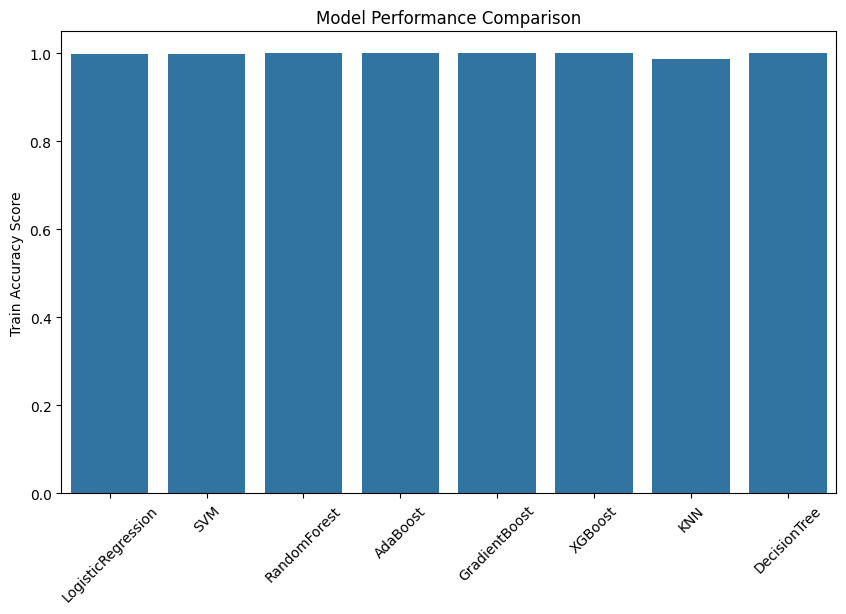

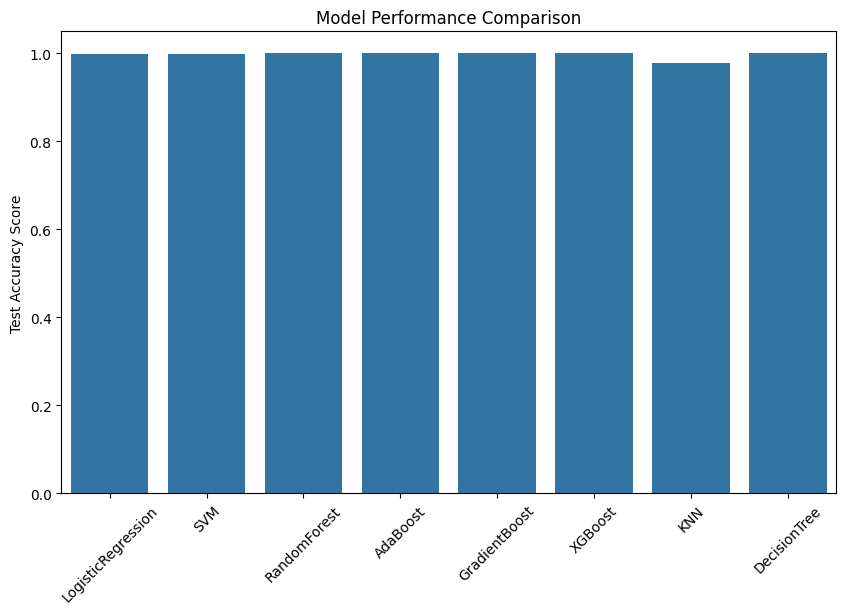

In [87]:
# Plot Model Performance

# Related with Accuracy
train_list=[]
for key, values in accuracy_dict.items():
   train_list.append(values[0])

test_list=[]
for key, values in accuracy_dict.items():
   test_list.append(values[1])
    
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_dict.keys()), y=train_list)
plt.xticks(rotation=45)
plt.ylabel("Train Accuracy Score")
plt.title("Model Performance Comparison")
plt.show()
    

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_dict.keys()), y=test_list)
plt.xticks(rotation=45)
plt.ylabel("Test Accuracy Score")
plt.title("Model Performance Comparison")
plt.show()




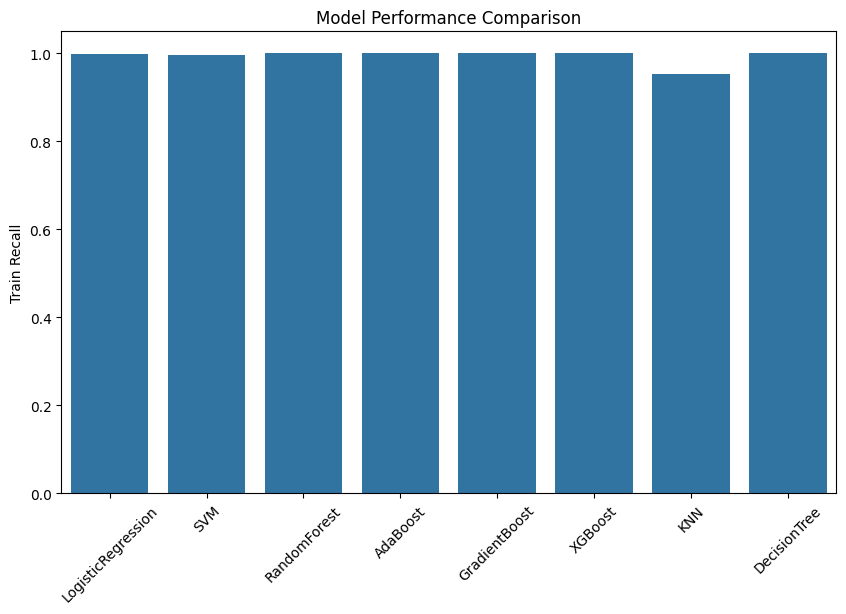

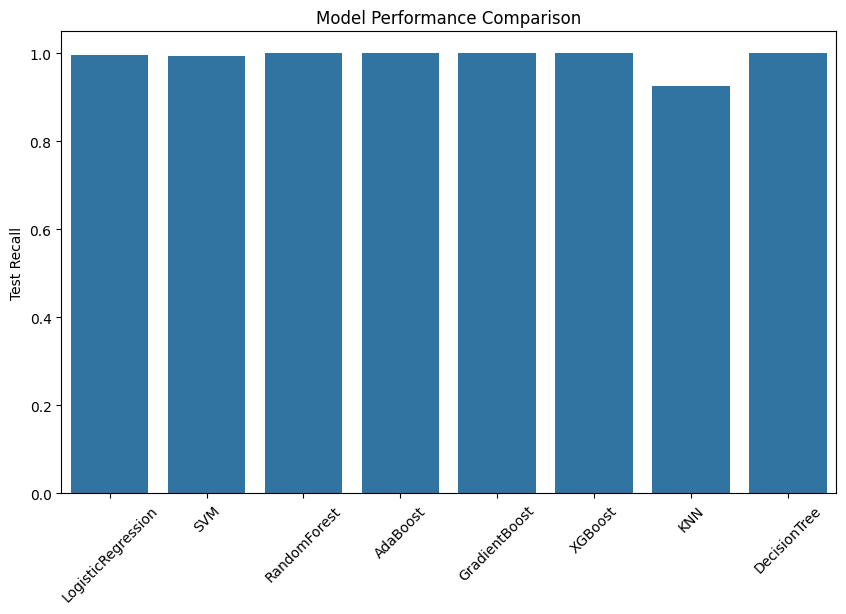

In [88]:
# Related to Recall
train_list=[]
for key, values in recall_dict.items():
   train_list.append(values[0])

test_list=[]
for key, values in recall_dict.items():
   test_list.append(values[1])
    
plt.figure(figsize=(10, 6))
sns.barplot(x=list(recall_dict.keys()), y=train_list)
plt.xticks(rotation=45)
plt.ylabel("Train Recall")
plt.title("Model Performance Comparison")
plt.show()
    

plt.figure(figsize=(10, 6))
sns.barplot(x=list(recall_dict.keys()), y=test_list)
plt.xticks(rotation=45)
plt.ylabel("Test Recall")
plt.title("Model Performance Comparison")
plt.show()


Hyperparameter Tuning

In [89]:
params={
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 10, 15, 20],
    'max_features': ['auto', 5, 6, 7, 8],
    'min_samples_split': [2, 8, 15, 20],
    'n_estimators': [100, 200, 500, 100]
}

In [90]:
# Models list for Hyperparameter tuning
randomcv_models= [
    ('Random Forest', RandomForestClassifier(), params)
]

In [91]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model, 
                                param_distributions=params,
                                n_iter=100,
                                cv=4,
                                verbose=2,
                                n_jobs=-1
                               )

    random.fit(X_train_scaled, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"Best parameters for {model_name} are:")
    print(model_param[model_name])

Fitting 4 folds for each of 100 candidates, totalling 400 fits
Best parameters for Random Forest are:
{'n_estimators': 100, 'min_samples_split': 8, 'max_features': 8, 'max_depth': 3}


Training Model With The Best Parameters

In [92]:
models={
    "RandomForest":RandomForestClassifier(n_estimators=100, min_samples_split= 2, max_features= 7, max_depth= 20),
}
    
for i in range(len(list(models))):
    model = list(models.values())[i]
    
    # Training
    model.fit(X_train_scaled, y_train) 

    # Making Predictions
    y_train_pred= model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)  

    # Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average="weighted")
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_roc_auc_score = roc_auc_score(y_train, y_train_pred)

    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average="weighted")
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_roc_auc_score = roc_auc_score(y_test, y_test_pred)


    print(list(models.keys())[i])
    print('Model performance for Training set')
    print("-Accuracy: {:.4f}".format(model_train_accuracy))
    print("-F1 score: {:.4f}".format(model_train_f1))
    print("-Precision: {:.4f}".format(model_train_precision))
    print("-Recall: {:.4f}".format(model_train_recall))
    print("-Roc auc score: {:.4f}".format(model_train_roc_auc_score))

    print("."*40)

    print('Model performance for Test set')
    print("-Accuracy: {:.4f}".format(model_test_accuracy))
    print("-F1 score: {:.4f}".format(model_test_f1))
    print("-Precision: {:.4f}".format(model_test_precision))
    print("-Recall: {:.4f}".format(model_test_recall))
    print("-Roc auc score: {:.4f}".format(model_test_roc_auc_score))

    print("="*40)
    print('\n')

RandomForest
Model performance for Training set
-Accuracy: 1.0000
-F1 score: 1.0000
-Precision: 1.0000
-Recall: 1.0000
-Roc auc score: 1.0000
........................................
Model performance for Test set
-Accuracy: 1.0000
-F1 score: 1.0000
-Precision: 1.0000
-Recall: 1.0000
-Roc auc score: 1.0000




Predict the Diagnosis for someone: